fill_between
subplots
ylim

## Assignment 4

In [2]:
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [5]:
df

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,64756,2.622,-73.74,41.79,2.5,-2.1,0.2,0.3,0.0,7.50,...,0.275,0.248,0.191,0.192,1.3,1.4,1.9,3.2,4.7,NaN
2018-12-28,64756,2.622,-73.74,41.79,11.6,1.9,6.8,7.6,11.5,0.45,...,0.295,0.261,0.193,0.191,2.9,2.7,2.5,3.1,4.5,NaN
2018-12-29,64756,2.622,-73.74,41.79,11.3,-2.1,4.6,6.3,0.0,4.89,...,0.295,0.270,0.208,0.191,4.5,4.4,4.0,3.8,4.5,NaN


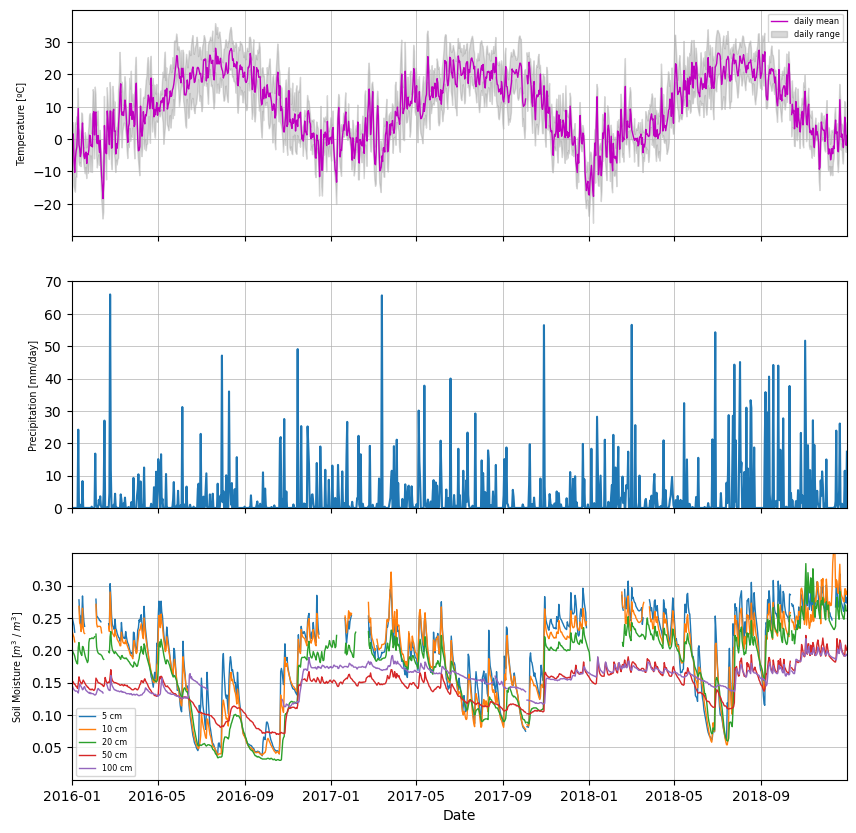

In [18]:
fig,ax = plt.subplots(nrows=3,figsize=(10,10))
ax0,ax1,ax2 = ax

ax0.plot(date, t_daily_mean, label="daily mean", color='m', linewidth=1)
ax0.fill_between(date, t_daily_min, t_daily_max, label='daily range', 
                 color='tab:grey', alpha=0.3)
ax0.legend(loc='upper right', fontsize='xx-small')
ax0.xaxis.set_ticklabels('')
ax0.set_ylabel('Temperature [ºC]', fontsize='x-small')
ax0.set_yticks(np.array([-20,-10,0,10,20,30]))
ax0.set_ylim(bottom=-30, top=40)
ax0.set_xlim(date[0],date[-1])
ax0.grid(linewidth=0.5)

ax1.plot(date, p_daily_calc)
ax1.xaxis.set_ticklabels('')
ax1.set_ylabel('Precipitation [mm/day]', fontsize='x-small')
ax1.set_ylim(bottom=0, top=70)
ax1.set_xlim(date[0],date[-1])
ax1.grid(linewidth=0.5)

ax2.plot(date, soil_moisture_5, label="5 cm", linewidth=1)
ax2.plot(date, soil_moisture_10, label="10 cm", linewidth=1)
ax2.plot(date, soil_moisture_20, label="20 cm", linewidth=1)
ax2.plot(date, soil_moisture_50, label="50 cm", linewidth=1)
ax2.plot(date, soil_moisture_100,label="100 cm", linewidth=1)
ax2.legend(loc = 'lower left', fontsize='xx-small')
ax2.set_ylabel('Soil Moisture [$m^3$ / $m^3$]', fontsize='x-small')
ax2.set_xlabel('Date')
ax2.set_yticks(np.array([0.05,0.10,0.15,0.20,0.25,0.30]))
ax2.set_ylim(bottom=0, top=0.35)
ax2.set_xlim(date[0],date[-1])
ax2.grid(linewidth=0.5)